In [137]:
import urllib
from matplotlib import font_manager
from matplotlib import pyplot as plt

font_path = 'NanumGothic.ttf'
with open(font_path, 'wb') as f: 
    f.write(urllib.request.urlopen("https://github.com/team-monolith-product/jupyter-nanum/raw/main/NanumGothic.ttf").read())

# 글꼴을 등록합니다.
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = font_manager.FontProperties(fname=font_path).get_name()

In [139]:
import pandas as pd

df = pd.DataFrame(data, columns = ['나이','점수'])
df.to_csv('시험점수.csv', index = False)

In [140]:
import pandas as pd

df = pd.read_csv('시험점수.csv')
df

,나이,점수
0,23,12
1,28,91
2,29,2
3,24,98
4,22,6
...,...,...
115,20,85
116,22,11
117,28,84
118,23,4


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   나이      120 non-null    int64
 1   점수      120 non-null    int64
dtypes: int64(2)
memory usage: 2.0 KB


In [142]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

model = KMeans(n_clusters = 3)
pred = model.fit_predict(df[['나이', '점수']])
df['클러스터'] = pred
df

,나이,점수,클러스터
0,23,12,1
1,28,91,0
2,29,2,1
3,24,98,0
4,22,6,1
...,...,...,...
115,20,85,0
116,22,11,1
117,28,84,0
118,23,4,1


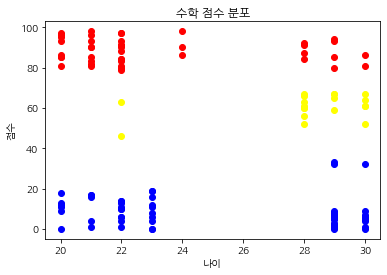

In [143]:
from matplotlib import pyplot as plt

df1 = df[df['클러스터'] == 0]
df2 = df[df['클러스터'] == 1]
df3 = df[df['클러스터'] == 2]

plt.scatter(df1['나이'],df1['점수'],color = 'red')
plt.scatter(df2['나이'],df2['점수'],color = 'blue') 
plt.scatter(df3['나이'],df3['점수'],color = 'yellow')

plt.title('수학 점수 분포')
plt.xlabel('나이')
plt.ylabel('점수')

plt.show()

In [144]:
scaler = MinMaxScaler()
scaler.fit(df[['나이']])
df['나이'] = scaler.transform(df[['나이']])

scaler = MinMaxScaler()
scaler.fit(df[['점수']])
df['점수'] = scaler.transform(df[['점수']])

df

,나이,점수,클러스터
0,0.3,0.122449,1
1,0.8,0.928571,0
2,0.9,0.020408,1
3,0.4,1.000000,0
4,0.2,0.061224,1
...,...,...,...
115,0.0,0.867347,0
116,0.2,0.112245,1
117,0.8,0.857143,0
118,0.3,0.040816,1


In [145]:
model = KMeans(n_clusters = 3)
pred = model.fit_predict(df[['나이', '점수']])
df['클러스터'] = pred
df

,나이,점수,클러스터
0,0.3,0.122449,1
1,0.8,0.928571,0
2,0.9,0.020408,0
3,0.4,1.000000,2
4,0.2,0.061224,1
...,...,...,...
115,0.0,0.867347,2
116,0.2,0.112245,1
117,0.8,0.857143,0
118,0.3,0.040816,1


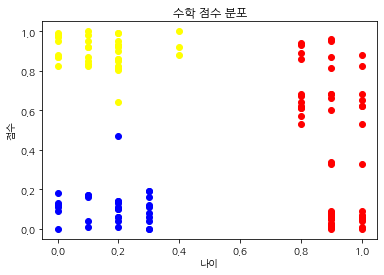

In [146]:
from matplotlib import pyplot as plt

df1 = df[df['클러스터'] == 0]
df2 = df[df['클러스터'] == 1]
df3 = df[df['클러스터'] == 2]

plt.scatter(df1['나이'],df1['점수'],color = 'red')
plt.scatter(df2['나이'],df2['점수'],color = 'blue') 
plt.scatter(df3['나이'],df3['점수'],color = 'yellow')

plt.title('수학 점수 분포')
plt.xlabel('나이')
plt.ylabel('점수')

plt.show()

In [147]:
model.cluster_centers_

array([[0.90740741, 0.40230537],
       [0.178125  , 0.11096939],
       [0.14411765, 0.89765906]])

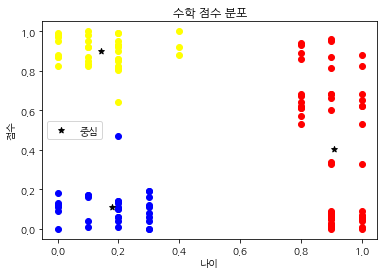

In [148]:
from matplotlib import pyplot as plt

df1 = df[df['클러스터'] == 0]
df2 = df[df['클러스터'] == 1]
df3 = df[df['클러스터'] == 2]

plt.scatter(df1['나이'],df1['점수'],color = 'red')
plt.scatter(df2['나이'],df2['점수'],color = 'blue') 
plt.scatter(df3['나이'],df3['점수'],color = 'yellow')

plt.title('수학 점수 분포')
plt.xlabel('나이')
plt.ylabel('점수')

plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], color = 'black', marker = '*', label = '중심')
plt.legend()

plt.show()